In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train.shape

(60000, 28, 28)

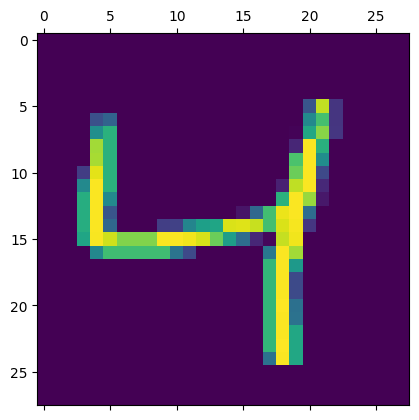

In [5]:
plt.matshow(x_train[2])

In [6]:
y_train[2]

4

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train_flattened=x_train.reshape(len(x_train), len(x_train[0])*len(x_train[0]))
x_test_flattened=x_test.reshape(len(x_test),len(x_test[0])*len(x_test[0]))

In [9]:
x_train_flattened.shape

(60000, 784)

In [10]:
x_test_flattened.shape

(10000, 784)

In [11]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
model=keras.Sequential(
[
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_flattened, y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4683 - accuracy: 0.8778
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9265
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2580 - accuracy: 0.9282
Epoch 8/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2557 - accuracy: 0.9292
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9300
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.250

In [13]:
y_pred=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [14]:
# a=y_pred[0]
# maxi=max(a)
# for i in range(len(a)):
#     if a[i]==maxi:
#         index=i
# print(index)
np.argmax(y_pred[1])

2

In [15]:
y_pred_labels=[ np.argmax(i) for i in y_pred ]

In [16]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    1,    6,    7,    3,    1,    0],
       [   0, 1114,    4,    1,    0,    1,    4,    2,    9,    0],
       [   6,    8,  931,   13,    8,    3,   13,   10,   37,    3],
       [   3,    0,   20,  916,    1,   24,    2,   10,   28,    6],
       [   1,    1,    5,    2,  916,    0,   11,    6,    8,   32],
       [  10,    3,    2,   34,    7,  770,   14,    9,   39,    4],
       [  11,    3,    7,    1,    7,   14,  911,    1,    3,    0],
       [   1,    7,   22,    2,    5,    1,    0,  954,    3,   33],
       [   5,    8,    5,   16,    7,   18,    8,    8,  888,   11],
       [   8,    8,    1,    8,   18,    8,    0,   21,    9,  928]])>

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_labels)

0.9287

Text(95.72222222222221, 0.5, 'Truth')

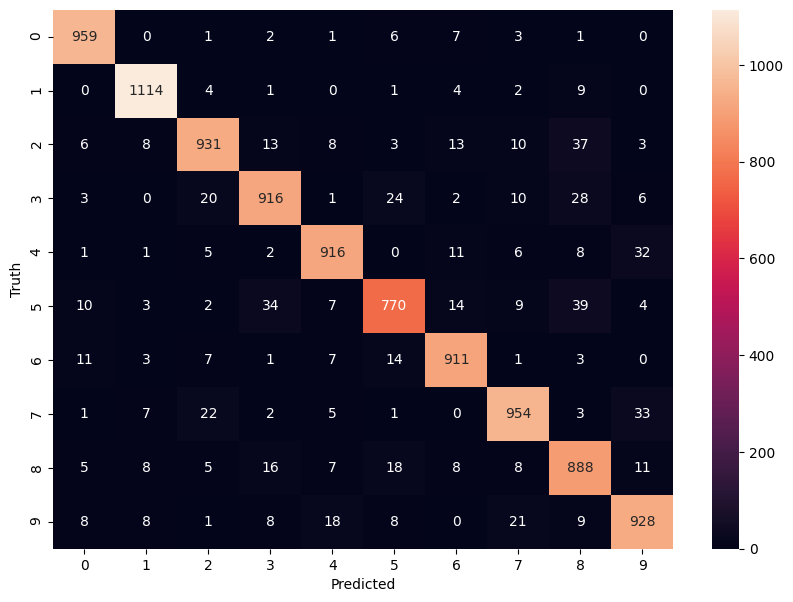

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [28]:
model2=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(x_train_flattened, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2826 - accuracy: 0.9200
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1263 - accuracy: 0.9625
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9745
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9808
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9841
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0328 - accuracy: 0.9902
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0261 - accuracy: 0.9925
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [29]:
y_pred2=model2.predict(x_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [30]:
y_pred2_labels=[np.argmax(i) for i in y_pred2]

In [31]:
cm2=tf.math.confusion_matrix(labels=y_test, predictions=y_pred2_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    1,    0,    0,    1,    2,    0],
       [   0, 1127,    2,    2,    0,    1,    1,    0,    2,    0],
       [   5,    3, 1008,    0,    1,    0,    1,    5,    7,    2],
       [   0,    0,    8,  984,    0,    3,    0,    3,    5,    7],
       [   0,    1,    6,    0,  959,    0,    2,    3,    3,    8],
       [   6,    0,    0,   15,    1,  859,    5,    0,    4,    2],
       [   6,    3,    0,    1,    5,    9,  930,    3,    1,    0],
       [   0,    2,   12,    2,    2,    0,    0,  999,    3,    8],
       [   5,    1,    3,    7,    2,    4,    0,    3,  944,    5],
       [   3,    3,    0,    3,    4,    3,    0,    4,    7,  982]])>

Text(95.72222222222221, 0.5, 'Truth')

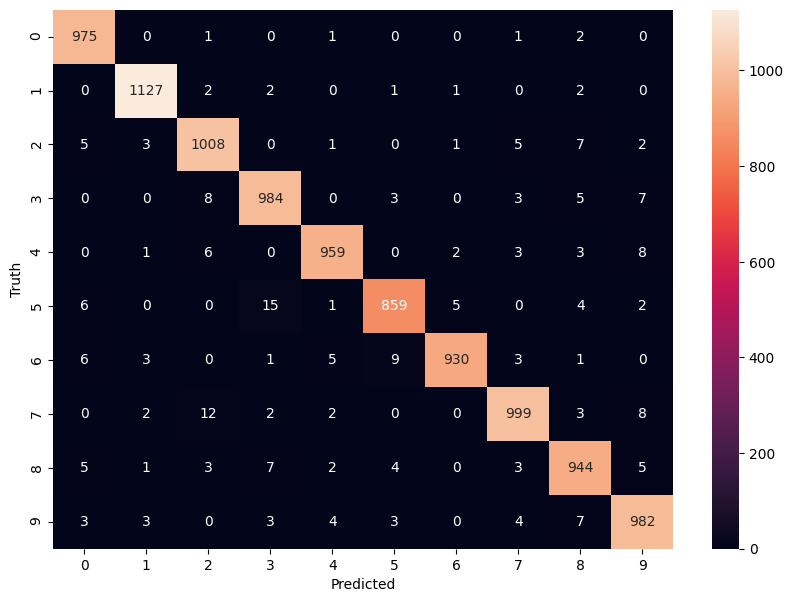

In [32]:
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [33]:
accuracy_score(y_test, y_pred2_labels)

0.9767